# 2020/09/26 定期勉強会 データ分析演習

## ライブラリの読み込み
<br>
分析に使用するライブラリを読み込みます。ライブラリを読み込んでおくことで、できることが増えます。

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as sp
from sklearn.datasets import load_boston

## データの読み込み
<br>
今回はライブラリのデータを使用します。
<br>
ライブラリを読み込んでいたおかげで、データを簡単に読み込めるようになりました。

In [2]:
data = load_boston()

In [3]:
# データを扱いやすいようにpandasのdata.frameに変換する
df = pd.DataFrame(data.data, columns = data.feature_names).assign(MEDV=np.array(data.target))

### データの軽い確認
<br>
データの頭5行何列か、という構造を軽く確認します。

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 変数の説明

| カラム | 説明 |
| ---- | ---- |
| CRIM | 町ごとの一人当たりの犯罪率 |
| ZN | 宅地の比率が25,000平方フィートを超える敷地に区画されている。 |
| INDUS |	町当たりの非小売業エーカーの割合 |
| CHAS | チャーリーズ川ダミー変数（川の境界にある場合は1、それ以外の場合は0） |
| NOX | 一酸化窒素濃度（1000万分の1） |
| RM | 1住戸あたりの平均部屋数 |
| AGE | 1940年以前に建設された所有占有ユニットの年齢比率 |
| DIS | 5つのボストンの雇用センターまでの加重距離 |
| RAD | ラジアルハイウェイへのアクセス可能性の指標 |
| TAX |	10,000ドルあたりの税全額固定資産税率 |
| PTRATIO |	生徒教師の比率 |
| B | 町における黒人の割合 |
| LSTAT | 人口当たり地位が低い率 |
| MEDV | 1000ドルでの所有者居住住宅の中央値 |

## 仮説の確認
<br>
仮説：住宅価格(1000$)は、「非小売業エーカーの割合(%)」、「平均部屋数(部屋)」、「税全額固定資産税率(部屋)」、「生徒教師の比率(%)」、「地位が低い人の割合(%)」によって算出される。

## 使用する変数
<br>

| 目的変数（予測したい値） | 説明 |
| ---- | ---- |
| MEDV | 住宅価格 |

<br>

| 説明変数（予測したい値に影響を与える変数） | 説明 |
| ---- | ---- |
| INDUS |	町当たりの非小売業エーカーの割合 |
| RM | 1住戸あたりの平均部屋数 |
| TAX |	10,000ドルあたりの税全額固定資産税率 |
| PTRATIO |	生徒教師の比率 |
| LSTAT | 人口当たり地位が低い率 |

## データ収集
<br>
仮説に沿ったデータのみを抽出する。

In [ ]:
df = df[['SalePrice', 'LotArea', 'YearRemodAdd', 'TotRmsAbvGrd', 'YrSold']]

### データの確認
<br>
変数の数とデータ件数の確認。

In [ ]:
print('(行数, 列数) = ', df.shape)

データの情報を確認する。

In [ ]:
df.info()

### 欠損値の確認

In [ ]:
print('Train columns with null values: {} \n' .format(df.isnull().sum()))

### データの基礎統計量の確認
<br>
・項目の説明

count: 要素の個数

mean: 平均

std: 標準偏差

min: 最小値

25%: 第一四分位数

75%: 第三四分位数

50%: 中央値 (median)

max: 最大値

In [ ]:
df.describe()

相関係数の算出

In [8]:
df_corr = df_corr = df.corr()
display(df_corr)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


相関係数を見やすく。

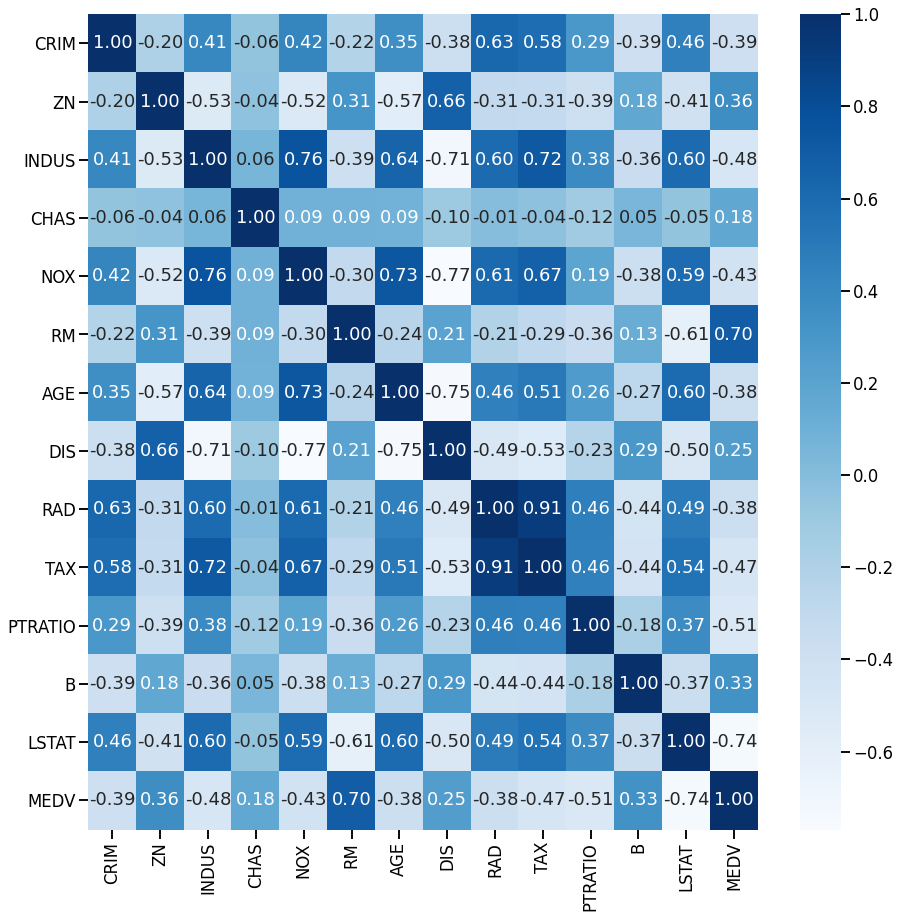

In [9]:
sns.set_context('talk')
fig = plt.subplots(figsize = (15, 15))
 
sns.heatmap(df_corr, annot = True, fmt = '.2f', cmap = 'Blues', square = False)

全体のヒストグラムと散布図の描画。

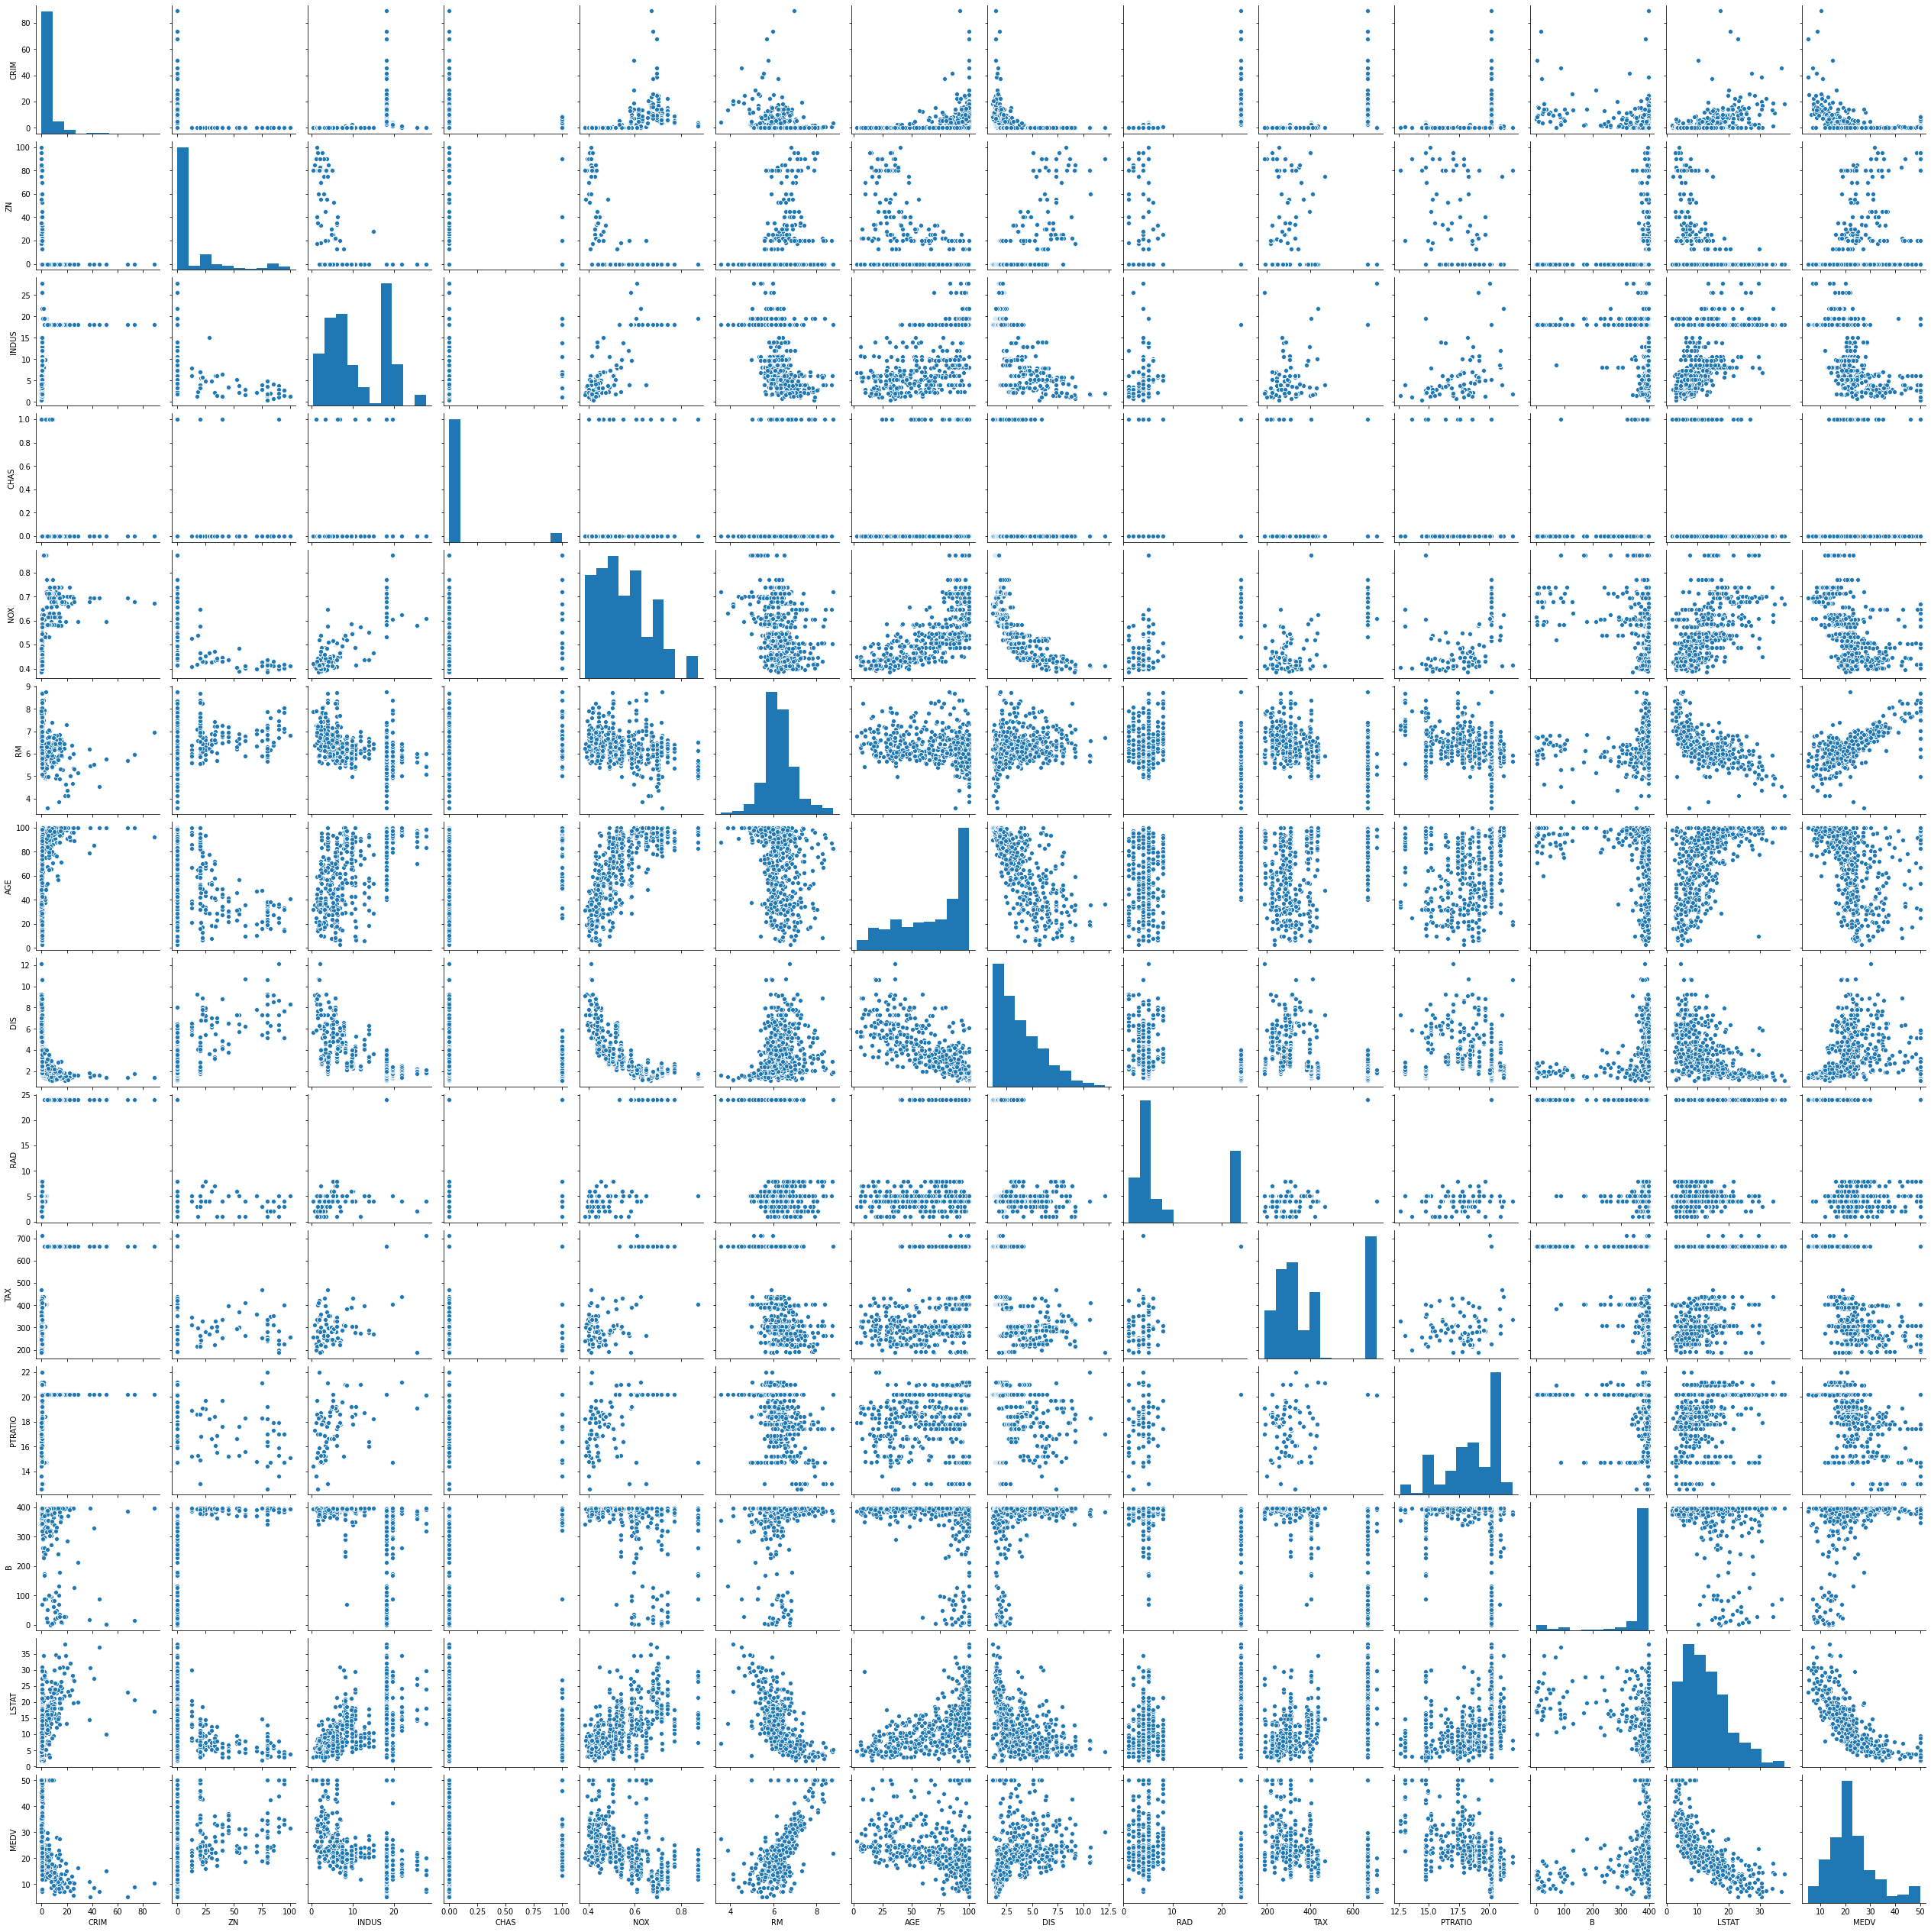

In [6]:
sns.pairplot(df)

### 目的変数のみ確認

ヒストグラム描画

In [ ]:
%matplotlib inline
df['MEDV'].hist(bins = 50, figsize = (10, 7.5))
plt.rcParams['figure.figsize'] = [20, 15]

箱ひげ図描画

In [ ]:
%matplotlib inline
fig_o, ax_o = plt.subplots(figsize=(9.6, 5))
ax_o.set_title('Box Plot')
ax_o.boxplot(df['MEDV'], vert = False,  labels=['MEDV'])
plt.rcParams['figure.figsize'] = [20, 15]

目的変数が正規分布に従っていないことを確認しておく。

### 説明変数のみ確認

ヒストグラム描画

In [ ]:
%matplotlib inline
train_data[['LotArea', 'YearRemodAdd', 'TotRmsAbvGrd', 'YrSold']].hist(bins=50, figsize=(15,7.5))
plt.rcParams['figure.figsize'] = [20, 15]

## データ加工

### 変数の作成
<br>
仮説では、「建築年・改築年からの経過年数(年)」が住宅価格に影響を与えているとしていたので、「経過年数」という変数を作成する。

それに伴い、元データの「建築年・改築年」、「販売年」という変数を削除する。

In [ ]:
train_data['ElapYr'] = train_data['YrSold'] - train_data['YearRemodAdd']
train_data.drop(['YearRemodAdd', 'YrSold'], axis = 1, inplace = True)

データの再確認

In [ ]:
train_data.head()

In [ ]:
train_corr = train_corr = train_data.corr()
display(train_corr)

In [ ]:
sns.set_context('talk')
fig = plt.subplots(figsize = (8, 8))
 
sns.heatmap(train_corr, annot = True, fmt = '.2f', cmap = 'Blues', square = True)

In [ ]:
sns.pairplot(train_data)

### 外れ値対処

In [ ]:
%matplotlib inline
fig_o, ax_o = plt.subplots(figsize=(9.6, 5))
ax_o.set_title('Box Plot')
ax_o.boxplot(train_data['LotArea'], vert = False,  labels=['LotArea'])
plt.rcParams['figure.figsize'] = [20, 15]

外れ値の除去。

In [ ]:
train_data.query('LotArea <= 39000', inplace = True)

In [ ]:
%matplotlib inline
train_data['LotArea'].hist(bins = 50, figsize = (10, 7.5))
plt.rcParams['figure.figsize'] = [20, 15]

In [ ]:
train_corr = train_corr = train_data.corr()
display(train_corr)

In [ ]:
sns.set_context('talk')
fig = plt.subplots(figsize = (8, 8))
 
sns.heatmap(train_corr, annot = True, fmt = '.2f', cmap = 'Blues', square = True)

「敷地面積」の外れ値を除去したら、「敷地面積」と「地上以上の部屋数」間に多重共線性(マルチコ)がありそうに見えてきましたが、今回は取り敢えず無視します。

In [ ]:
sns.pairplot(train_data)

## 回帰分析

一旦データを再確認する。

In [ ]:
train_data.head()

In [ ]:
train_data.info()

In [ ]:
train_data.describe()

In [ ]:
%matplotlib inline
np.log(train_data['SalePrice']).hist(bins = 50, figsize = (10, 7.5))
plt.rcParams['figure.figsize'] = [20, 15]

### モデル構築
<br>
・目的変数：

SalePrice - 住宅価格
<br><br>
・説明変数：

LotArea - 敷地面積

TotRmsAbvGrd - 地上以上の部屋数

ElapYr - 経過年数
<br><br>
#### モデル式
$ {\rm SalePrice} = \beta_0 + {\rm LotArea} \: \times \beta_1 + {\rm TotRmsAbvGrd} \: \times \beta_2 + {\rm ElapYr} \: \times \beta_3 $

In [ ]:
x = train_data[['LotArea', 'TotRmsAbvGrd', 'ElapYr']]
y = np.log(train_data['SalePrice'])
X = sm.add_constant(x)

model = sm.OLS(y, X)
result = model.fit()
result.summary()

### 着目する値
<br>
・Adj. R-squared: 自由度調整済み決定係数

・Prob (F-statistic): モデルに対するF検定の有意確率

・coef: 偏回帰係数

・P>|t|: 偏回帰係数に対するt検定の有意確率

・（必要に応じて）AIC: 赤池情報量基準

・（必要に応じて）BIC: ベイズ情報量基準

### 自社データに適応させる

In [ ]:
test_data = pd.read_csv('input/test.csv')
test_data = test_data[['LotArea', 'YearRemodAdd', 'TotRmsAbvGrd', 'YrSold']]
test_data['ElapYr'] = test_data['YrSold'] - test_data['YearRemodAdd']
test_data.drop(['YearRemodAdd', 'YrSold'], axis = 1, inplace = True)
test_data.query('LotArea <= 39000', inplace = True)

In [ ]:
test_data.head()

In [ ]:
pd.DataFrame(result.params)

In [ ]:
test_data['pred_val'] = result.params['const'] + \
    test_data['LotArea'] * result.params['LotArea'] + \
    test_data['TotRmsAbvGrd'] * result.params['TotRmsAbvGrd'] + \
    test_data['ElapYr'] * result.params['ElapYr']

In [ ]:
test_data['pred_val'] = np.exp(test_data['pred_val'])

### 予測された自社保有住宅価格

In [ ]:
pd.DataFrame(test_data['pred_val'])

## 影響度比較

In [ ]:
x = train_data[['LotArea', 'TotRmsAbvGrd', 'ElapYr']]
y = np.log(train_data['SalePrice'])
y.reset_index(inplace=True, drop=True)
x_n = pd.DataFrame(sp.stats.zscore(x, axis=0), \
                   columns=['LotArea', 'TotRmsAbvGrd', 'ElapYr'])
X_n = sm.add_constant(x_n)

model = sm.OLS(y, X_n)
result = model.fit()
result.summary()